# Titantic - Machine Learning from Disaster

## Exploratory analysis

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [239]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [241]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [242]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [243]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [244]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

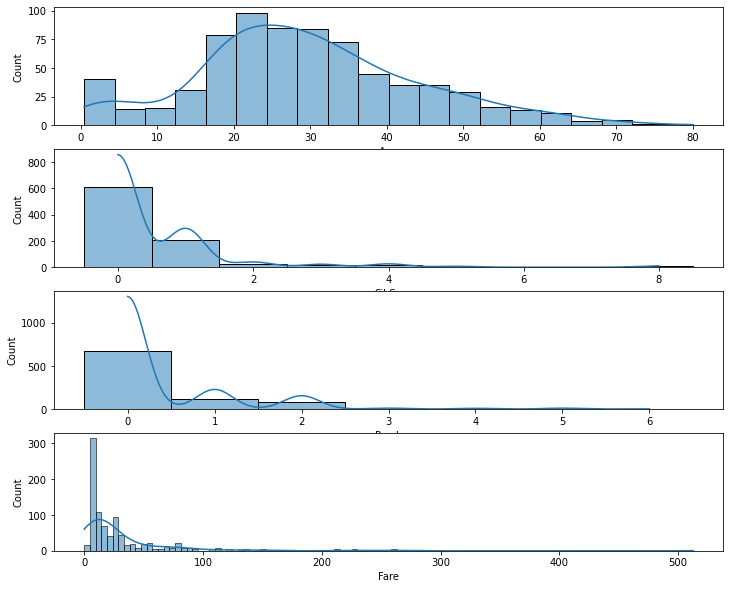

In [245]:
# Distribution of numerical features on training data
fig, ax = plt.subplots(4,1)
fig.set_figheight(10)
fig.set_figwidth(12)

sns.histplot(data = train_data, x='Age', kde=True, ax=ax[0])
sns.histplot(data = train_data, x='SibSp', discrete=True, kde=True, ax=ax[1])
sns.histplot(data = train_data, x='Parch', discrete=True, kde=True, ax=ax[2])
sns.histplot(data = train_data, x='Fare', kde=True, ax=ax[3])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

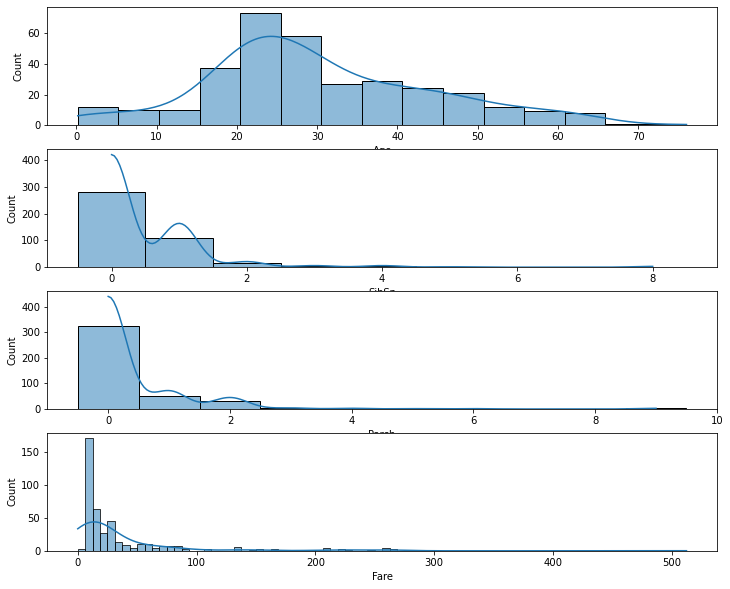

In [246]:
# Distribution of numerical features on testing data
fig, ax = plt.subplots(4,1)
fig.set_figheight(10)
fig.set_figwidth(12)

sns.histplot(data = test_data, x='Age', kde=True, ax=ax[0])
sns.histplot(data = test_data, x='SibSp', discrete=True, kde=True, ax=ax[1])
sns.histplot(data = test_data, x='Parch', discrete=True, kde=True, ax=ax[2])
sns.histplot(data = test_data, x='Fare', kde=True, ax=ax[3])

<AxesSubplot:xlabel='Embarked'>

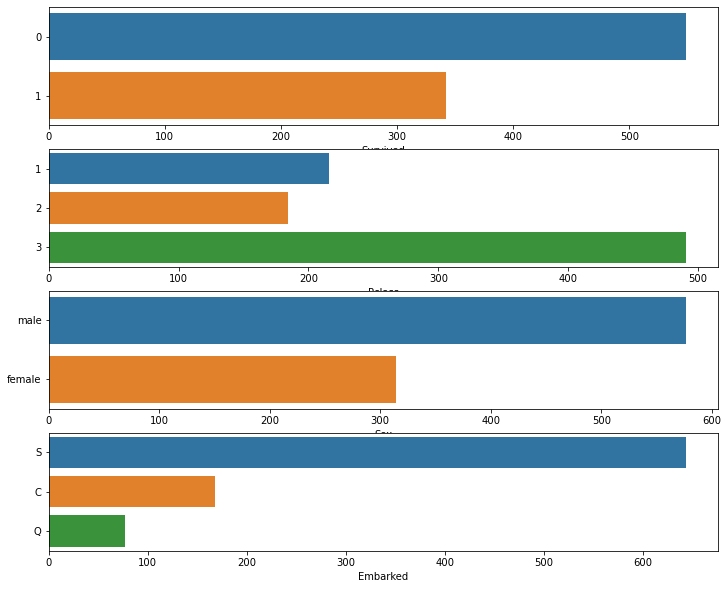

In [247]:
# Distribution of categorical features on training data
fig, ax = plt.subplots(4,1)
fig.set_figheight(10)
fig.set_figwidth(12)

sns.barplot(x=train_data['Survived'].value_counts(), y=train_data['Survived'].unique(), orient='h', ax=ax[0])
sns.barplot(x=train_data['Pclass'].value_counts(), y=train_data['Pclass'].unique(), orient='h', ax=ax[1])
sns.barplot(x=train_data['Sex'].value_counts(), y=train_data['Sex'].unique(), orient='h', ax=ax[2])
sns.barplot(x=train_data['Embarked'].dropna().value_counts(), y=train_data['Embarked'].dropna().unique(), orient='h', ax=ax[3])

<AxesSubplot:xlabel='Embarked'>

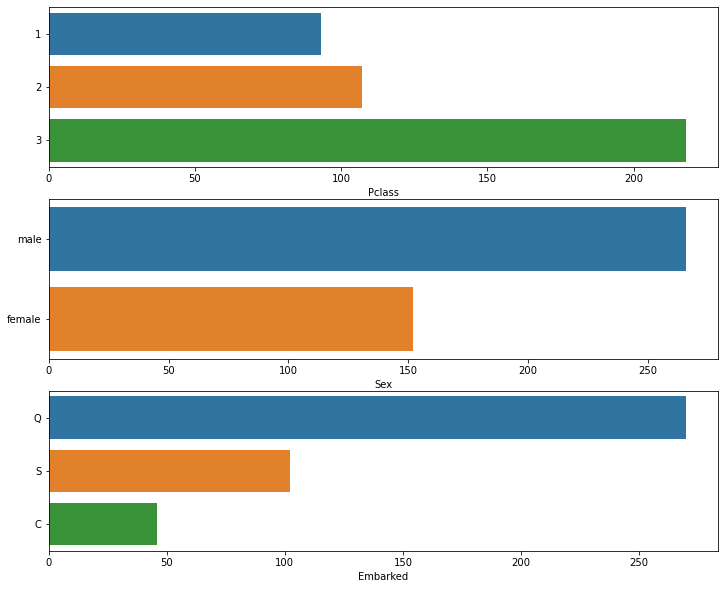

In [248]:
# Distribution of categorical features on testing data
fig, ax = plt.subplots(3,1)
fig.set_figheight(10)
fig.set_figwidth(12)

sns.barplot(x=test_data['Pclass'].value_counts(), y=test_data['Pclass'].unique(), orient='h', ax=ax[0])
sns.barplot(x=test_data['Sex'].value_counts(), y=test_data['Sex'].unique(), orient='h', ax=ax[1])
sns.barplot(x=test_data['Embarked'].dropna().value_counts(), y=test_data['Embarked'].dropna().unique(), orient='h', ax=ax[2])

In [249]:
# Add column for the number of family members on board
train_data['Family'] = train_data['SibSp'] + train_data['Parch']
test_data['Family'] = test_data['SibSp'] + test_data['Parch']

print(train_data[['SibSp', 'Parch', 'Family']])
print(test_data[['SibSp', 'Parch', 'Family']])

     SibSp  Parch  Family
0        1      0       1
1        1      0       1
2        0      0       0
3        1      0       1
4        0      0       0
..     ...    ...     ...
886      0      0       0
887      0      0       0
888      1      2       3
889      0      0       0
890      0      0       0

[891 rows x 3 columns]
     SibSp  Parch  Family
0        0      0       0
1        1      0       1
2        0      0       0
3        0      0       0
4        1      1       2
..     ...    ...     ...
413      0      0       0
414      0      0       0
415      0      0       0
416      0      0       0
417      1      1       2

[418 rows x 3 columns]


<AxesSubplot:xlabel='Family', ylabel='Count'>

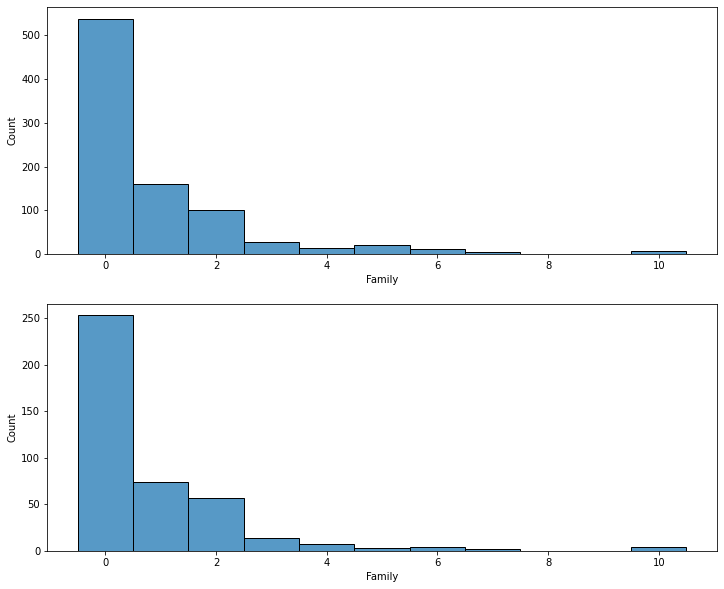

In [250]:
fig, ax = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(12)

sns.histplot(data=train_data, x='Family', discrete=True, ax=ax[0])
sns.histplot(data=test_data, x='Family', discrete=True, ax=ax[1])

In [251]:
# Isolate potential information in ticket numbers
def ticket_num(val):
    result = val.split()
    if (len(result) > 1):
        return result[1]
    else:
        return result[0]
    
def ticket_alpha(val):
    result = val.split()
    if (len(result) > 1):
        return result[0]
    else:
        return ""

train_data['Ticket number'] = train_data['Ticket'].apply(ticket_num)
test_data['Ticket number'] = test_data['Ticket'].apply(ticket_num)
train_data['Ticket letters'] = train_data['Ticket'].apply(ticket_alpha)
test_data['Ticket letters'] = test_data['Ticket'].apply(ticket_alpha)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket number,Ticket letters
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21171,A/5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,17599,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3101282,STON/O2.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,113803,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,373450,


<AxesSubplot:xlabel='Ticket number', ylabel='Count'>

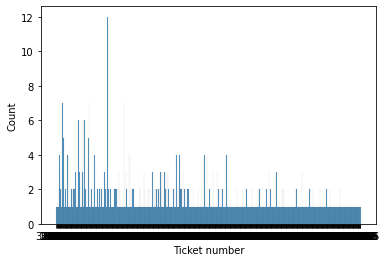

In [252]:
sns.histplot(data=train_data, x='Ticket number')

In [295]:
# This doesn't seem useful
train_data['Ticket number'].value_counts().head(10)

2.         12
347082      7
1601        7
2343        7
3101295     6
2144        6
347088      6
14879       5
382652      5
2666        4
Name: Ticket number, dtype: int64

In [296]:
train_data[train_data['Survived'] == 1]['Ticket number'].value_counts().head(10)

1601      5
2.        5
2666      4
113760    4
17755     3
17757     3
29106     3
347077    3
110152    3
24160     3
Name: Ticket number, dtype: int64

<AxesSubplot:xlabel='Ticket letters'>

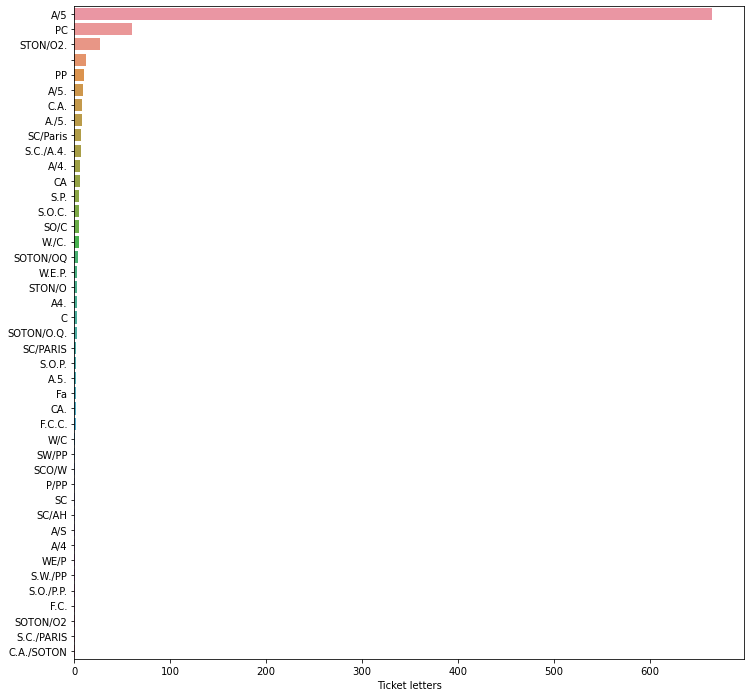

In [98]:
# This doesn't look very useful, either
plt.figure(figsize=(12,12))
sns.barplot(x=train_data['Ticket letters'].value_counts(), y=train_data['Ticket letters'].unique(), orient='h')

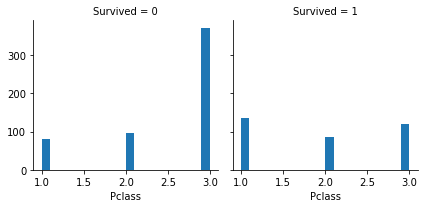

In [99]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Pclass', bins=20)

In [100]:
train_data[['Survived', 'Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


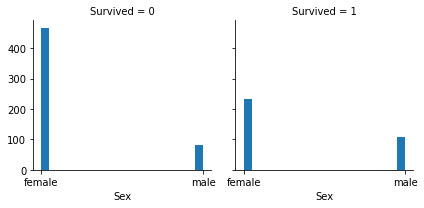

In [101]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Sex', bins=20)

In [102]:
train_data[['Survived', 'Sex']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


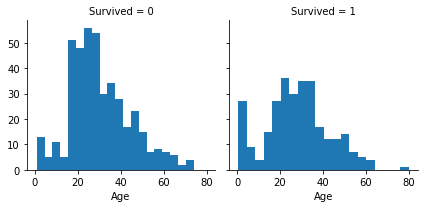

In [103]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Age', bins=20)

In [104]:
def age_groups(val):
    if (np.isnan(val)):
        return ""
    elif (val < 6):
        return '0-5'
    elif (6 <= val < 14):
        return '6-13'
    elif (14 <= val < 18):
        return '14-17'
    elif (18 <= val < 26):
        return '18-25'
    elif (val >= 65):
        return '65+'
    else:
        return '26-64'

train_data['AgeGroup'] = train_data['Age'].apply(age_groups)
test_data['AgeGroup'] = test_data['Age'].apply(age_groups)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket number,Ticket letters,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,21171,A/5,18-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,17599,PC,26-64
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,3101282,STON/O2.,26-64
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,113803,,26-64
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,373450,,26-64


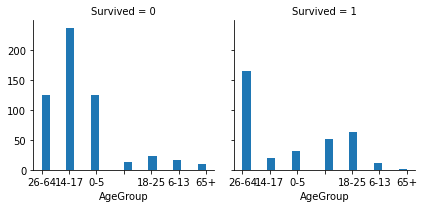

In [105]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'AgeGroup', bins=20)

In [106]:
# A closer look at age groups
train_data[['Survived', 'AgeGroup']].groupby('AgeGroup').mean()

,Survived
AgeGroup,
,0.293785
0-5,0.704545
14-17,0.452381
18-25,0.335106
26-64,0.410448
6-13,0.407407
65+,0.090909


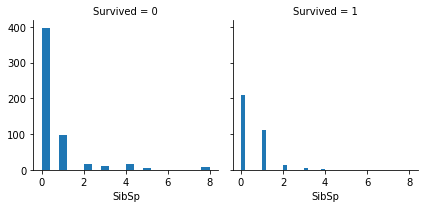

In [107]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'SibSp', bins=20)

In [108]:
train_data[['Survived', 'SibSp']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


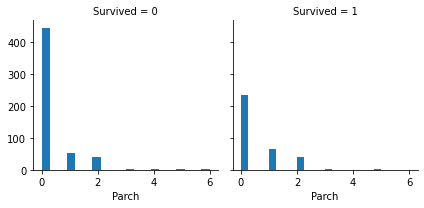

In [109]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Parch', bins=20)

In [110]:
train_data[['Survived', 'Parch']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


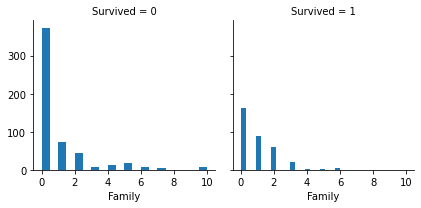

In [111]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Family', bins=20)

In [112]:
train_data[['Survived', 'Family']].groupby('Family').mean()

,Survived
Family,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


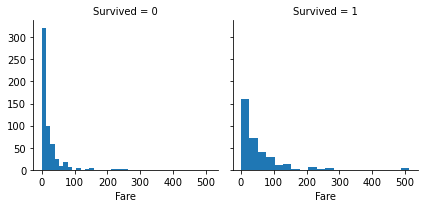

In [113]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'Fare', bins=20)

In [114]:
train_data['FareGroup'] = pd.qcut(train_data['Fare'], 4)
train_data[['Survived', 'FareGroup']].groupby('FareGroup').mean()

,Survived
FareGroup,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [115]:
fares = train_data['FareGroup'].unique().sort_values()

def fare_groups(val):
    if (np.isnan(val)):
        return np.nan
    elif (-0.001 < val <= 7.91):
        return fares[0]
    elif (7.91 < val <= 14.454):
        return fares[1]
    elif (14.454 < val <= 31.0):
        return fares[2]
    elif (31.0 < val <= 512.329):
        return fares[3]

test_data['FareGroup'] = test_data['Fare'].apply(fare_groups)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Ticket number,Ticket letters,AgeGroup,FareGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,330911,,26-64,"(-0.001, 7.91]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,363272,,26-64,"(-0.001, 7.91]"
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,240276,,26-64,"(7.91, 14.454]"
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,315154,,26-64,"(7.91, 14.454]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,3101298,,18-25,"(7.91, 14.454]"


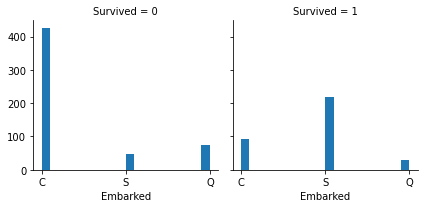

In [116]:
sns.FacetGrid(train_data[train_data['Embarked'].notnull()], col='Survived').map(plt.hist, 'Embarked', bins=20)

In [117]:
train_data[train_data['Embarked'].notnull()][['Survived', 'Embarked']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


## Data cleaning

In [118]:
# PassengerId, Name, and Ticket do not show usefulness (keeping PassengerId in test_data for final predictions)
# Cabin has too many missing values
# SibSp and Parch show some correlation, but Family seem to be a better predictor
# We should look more into ages first before dropping Age or AgeGroup
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Ticket number', 'Ticket letters', 'SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin', 'Ticket number', 'Ticket letters', 'SibSp', 'Parch'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
0,0,3,male,22.0,7.2500,S,1,18-25,"(-0.001, 7.91]"
1,1,1,female,38.0,71.2833,C,1,26-64,"(31.0, 512.329]"
2,1,3,female,26.0,7.9250,S,0,26-64,"(7.91, 14.454]"
3,1,1,female,35.0,53.1000,S,1,26-64,"(31.0, 512.329]"
4,0,3,male,35.0,8.0500,S,0,26-64,"(7.91, 14.454]"


In [120]:
# There is a missing fare in the test data
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Family          0
AgeGroup        0
FareGroup       2
dtype: int64

In [121]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
152,1044,3,male,60.5,NaN,S,0,26-64,NaN


In [137]:
# Get average fare of 3rd class males within the age group of 26-64
train_idx = (train_data['Pclass'] == 3) & (train_data['Sex'] == 'male') & (train_data['AgeGroup'] == '26-64')
test_idx = (test_data['Pclass'] == 3) & (test_data['Sex'] == 'male') & (test_data['AgeGroup'] == '26-64')

guess = np.mean([train_data.loc[train_idx, 'Fare'].mean(), test_data.loc[test_idx, 'Fare'].mean()])
guess

11.375198018648017

In [140]:
test_data.loc[test_data['Fare'].isnull(), 'Fare'] = guess
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            0
Embarked        0
Family          0
AgeGroup        0
FareGroup       2
dtype: int64

In [141]:
# Fill missing ages by guessing based on passenger class, sex, and fare group from both training and testing data
classes = np.arange(1,4) # 1-3
genders = ['male', 'female']
fares = train_data['FareGroup'].unique().sort_values()

# Store guess results
guesses = np.zeros((3,2,7))

for Pclass in classes:
    for i in range(len(genders)):
        for j in range(len(fares)):
            train_idx = (train_data['Pclass'] == Pclass) & (train_data['Sex'] == genders[i]) & (train_data['FareGroup'] == fares[j])
            test_idx = (test_data['Pclass'] == Pclass) & (test_data['Sex'] == genders[i]) & (test_data['FareGroup'] == fares[j])

            # Get ages
            train_ages = train_data[train_idx]['Age'].dropna()
            test_ages = test_data[test_idx]['Age'].dropna()

            train_ages.append(test_ages) # All ages

            guesses[Pclass-1][i][j] = train_ages.mean()

guesses # There are missing values where the combination of features is not found at all

array([[[37.5       ,         nan, 45.578125  , 39.39876923,
          0.        ,  0.        ,  0.        ],
        [        nan,         nan, 39.625     , 34.09090909,
          0.        ,  0.        ,  0.        ]],

       [[        nan, 33.70909091, 29.04290323, 22.23076923,
          0.        ,  0.        ,  0.        ],
        [        nan, 32.05357143, 27.55263158, 22.625     ,
          0.        ,  0.        ,  0.        ]],

       [[29.28017241, 27.54120482, 21.11111111, 14.66666667,
          0.        ,  0.        ,  0.        ],
        [21.93478261, 22.36764706, 20.796875  , 22.15384615,
          0.        ,  0.        ,  0.        ]]])

In [142]:
for Pclass in classes:
    for i in range(len(genders)):
        for j in range(len(fares)):
            train_idx = (train_data['Pclass'] == Pclass) & (train_data['Sex'] == genders[i]) & (train_data['FareGroup'] == fares[j]) & (train_data['Age'].isnull())
            test_idx = (test_data['Pclass'] == Pclass) & (test_data['Sex'] == genders[i]) & (test_data['FareGroup'] == fares[j]) & (test_data['Age'].isnull())

            guess = guesses[Pclass-1][i][j]

            train_data.loc[train_idx, 'Age'] = guess
            test_data.loc[test_idx, 'Age'] = guess

In [143]:
train_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          6
Fare         0
Embarked     2
Family       0
AgeGroup     0
FareGroup    0
dtype: int64

In [144]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
AgeGroup       0
FareGroup      2
dtype: int64

In [145]:
# Class 2, male, fare group (-0,001, 7.91] have missing ages
train_data[train_data['Age'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
277,0,2,male,NaN,0.0,S,0,,"(-0.001, 7.91]"
413,0,2,male,NaN,0.0,S,0,,"(-0.001, 7.91]"
466,0,2,male,NaN,0.0,S,0,,"(-0.001, 7.91]"
481,0,2,male,NaN,0.0,S,0,,"(-0.001, 7.91]"
674,0,2,male,NaN,0.0,S,0,,"(-0.001, 7.91]"
732,0,2,male,NaN,0.0,S,0,,"(-0.001, 7.91]"


In [146]:
# Let these remaining missing values be based solely on passenger class and sex
train_idx = (train_data['Pclass'] == 2) & (train_data['Sex'] == 'male')
test_idx = (test_data['Pclass'] == 2) & (test_data['Sex'] == 'male')

guess = np.mean([train_data[train_idx]['Age'].mean(), test_data[test_idx]['Age'].mean()])
guess

30.87529140688534

In [147]:
train_data.loc[train_data['Age'].isnull(), 'Age'] = guess

In [148]:
train_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     2
Family       0
AgeGroup     0
FareGroup    0
dtype: int64

In [149]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
AgeGroup       0
FareGroup      2
dtype: int64

In [150]:
train_data[train_data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
61,1,1,female,38.0,80.0,NaN,0,26-64,"(31.0, 512.329]"
829,1,1,female,62.0,80.0,NaN,0,26-64,"(31.0, 512.329]"


In [151]:
# Let them be the most common occurrence of Embarked
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [152]:
train_data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Family       0
AgeGroup     0
FareGroup    0
dtype: int64

In [153]:
train_data['AgeGroup'] = train_data['Age'].apply(age_groups)
test_data['AgeGroup'] = test_data['Age'].apply(age_groups)

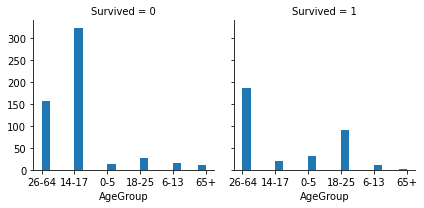

In [154]:
sns.FacetGrid(train_data, col='Survived').map(plt.hist, 'AgeGroup', bins=20)

In [155]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})

train_data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [156]:
train_data['Age'] = train_data['Age'].astype(int)
test_data['Age'] = test_data['Age'].astype(int)

train_data['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    20
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [157]:
embarked_mapping = dict(zip(train_data['Embarked'].unique(), range(3)))
embarked_mapping

{'S': 0, 'C': 1, 'Q': 2}

In [158]:
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [159]:
train_data[['Survived', 'AgeGroup']].groupby('AgeGroup').mean()

,Survived
AgeGroup,
0-5,0.704545
14-17,0.428571
18-25,0.369478
26-64,0.363992
6-13,0.407407
65+,0.090909


In [160]:
# Infant: 0-5
# Child: 6-17
# Adult: 18-64
# Senior: 65+
age_mapping = {'0-5':0, '6-13':1, '14-17':1, '18-25':2, '26-64':2, '65+':3}

train_data['AgeGroup'] = train_data['AgeGroup'].map(age_mapping)
test_data['AgeGroup'] = test_data['AgeGroup'].map(age_mapping)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
0,0,3,0,22,7.2500,0,1,2,"(-0.001, 7.91]"
1,1,1,1,38,71.2833,1,1,2,"(31.0, 512.329]"
2,1,3,1,26,7.9250,0,0,2,"(7.91, 14.454]"
3,1,1,1,35,53.1000,0,1,2,"(31.0, 512.329]"
4,0,3,0,35,8.0500,0,0,2,"(7.91, 14.454]"


In [161]:
fare_mapping = dict(zip(fares, range(4)))

train_data['FareGroup'] = train_data['FareGroup'].map(fare_mapping)
test_data['FareGroup'] = test_data['FareGroup'].map(fare_mapping)

train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
0,0,3,0,22,7.2500,0,1,2,0
1,1,1,1,38,71.2833,1,1,2,3
2,1,3,1,26,7.9250,0,0,2,1
3,1,1,1,35,53.1000,0,1,2,3
4,0,3,0,35,8.0500,0,0,2,1


In [162]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
0,892,3,0,34,7.8292,2,0,2,0.0
1,893,3,1,47,7.0000,0,1,2,0.0
2,894,2,0,62,9.6875,2,0,2,1.0
3,895,3,0,27,8.6625,0,0,2,1.0
4,896,3,1,22,12.2875,0,2,2,1.0


In [163]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
AgeGroup       0
FareGroup      2
dtype: int64

In [164]:
test_data[test_data['FareGroup'].isnull()]

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family,AgeGroup,FareGroup
152,1044,3,0,60,11.375198,0,0,2,NaN
343,1235,1,1,58,512.329200,1,1,2,NaN


In [165]:
test_data.loc[test_data['FareGroup'].isnull(), 'FareGroup'] = 3
test_data['FareGroup'] = test_data['FareGroup'].astype(int)

test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
AgeGroup       0
FareGroup      0
dtype: int64

## Model and predict

In [184]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import classification_report

In [231]:
Xtrain = train_data[['Pclass', 'Sex', 'AgeGroup', 'FareGroup', 'Embarked', 'Family']]
ytrain = train_data['Survived']
Xtest = test_data[['Pclass', 'Sex', 'AgeGroup', 'FareGroup', 'Embarked', 'Family']]

In [232]:
dtc = DTC()
dtc.fit(Xtrain, ytrain)
dtc.get_depth()

13

In [233]:
dtc.score(Xtrain, ytrain)

0.8619528619528619

In [234]:
print(classification_report(ytrain, dtc.predict(Xtrain)))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       549
           1       0.90      0.73      0.80       342

    accuracy                           0.86       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.87      0.86      0.86       891



In [235]:
results = dtc.predict(Xtest)
results

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [236]:
test_data['Survived'] = results

In [237]:
test_data[['PassengerId', 'Survived']].to_csv('gender_submission.csv', index=False)